In [27]:
%matplotlib inline
from pertpy.data import haber_2017_regions
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import median_abs_deviation
import pandas as pd
import random

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [3]:
adata = haber_2017_regions()

In [4]:
adata

AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label'

In [5]:
adata.obs['condition'].value_counts()

condition
Control        3240
Hpoly.Day10    2711
Hpoly.Day3     2121
Salmonella     1770
Name: count, dtype: int64

In [6]:
adata.obs['cell_label'].value_counts()

cell_label
TA.Early                 1970
Stem                     1857
Enterocyte.Progenitor    1822
Enterocyte               1458
TA                       1188
Goblet                    758
Tuft                      409
Endocrine                 380
Name: count, dtype: int64

In [7]:
adata.obs['batch'].value_counts()

batch
B8     1542
B5     1490
B3     1258
B7     1169
B10     950
B4      942
B1      840
B9      820
B6      631
B2      200
Name: count, dtype: int64

In [8]:
adata.obs['barcode'].value_counts()

barcode
GATCTACTTGTTTC    2
TAACAATGTCTGGA    2
AGAAACGAGTTTGG    2
TACGCGCTCTCCCA    2
CTTAAGCTCGGAGA    2
                 ..
CACTCTCTGAACCT    1
CACTCTCTGAACTC    1
CACTCTCTGAGGTG    1
CACTCTCTGTAAAG    1
CACTCCGAGTCAAC    1
Name: count, Length: 9774, dtype: int64

In [9]:
adata.var.index.value_counts().max()  # all is unique

1

In [10]:
adata.var.head()

""
index
A130010J15Rik
A130014A01Rik
A130051J06Rik
A130057D12Rik
A1cf


In [11]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [12]:
adata.var.sum()

mt      0
ribo    0
hb      0
dtype: int64

In [13]:
adata.X.max()

4385.0

In [14]:
sc.pp.calculate_qc_metrics(
    adata, inplace=True, log1p=True
)
adata

AnnData object with n_obs × n_vars = 9842 × 15215
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [15]:
adata.obs["total_counts"]

index
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor        6263.0
B1_AAACGCACGAGGAC_Control_Stem                         3356.0
B1_AAACGCACTAGCCA_Control_Stem                         4117.0
B1_AAACGCACTGTCCC_Control_Stem                         1972.0
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor        5135.0
                                                        ...  
B10_TTTCACGACAAGCT_Salmonella_TA                       2515.0
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte               5801.0
B10_TTTCAGTGCGACAT_Salmonella_Stem                     3570.0
B10_TTTCAGTGTGACCA_Salmonella_Endocrine                9167.0
B10_TTTCAGTGTTCTCA_Salmonella_Enterocyte.Progenitor    3524.0
Name: total_counts, Length: 9842, dtype: float32

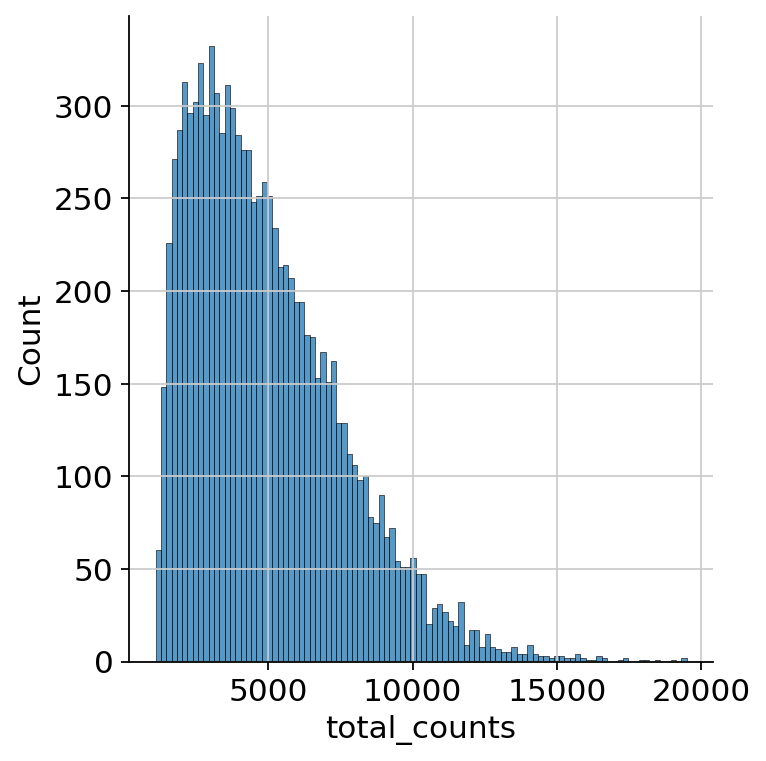

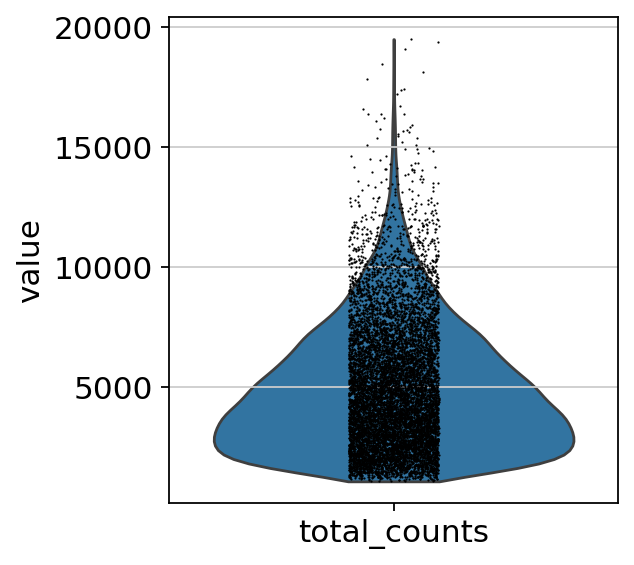

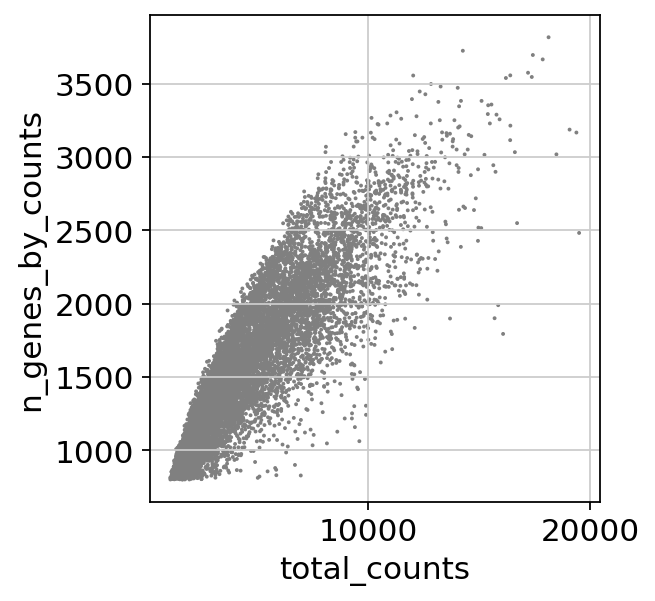

In [16]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata, 'total_counts')
# p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts")

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=20)

In [18]:
adata

AnnData object with n_obs × n_vars = 9842 × 12515
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [19]:
adata.layers["counts"] = adata.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)

In [20]:
sc.pp.highly_variable_genes(adata,n_top_genes=7000, subset=True)
adata

AnnData object with n_obs × n_vars = 9842 × 7000
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [21]:
adata.obs['condition'].value_counts()

condition
Control        3240
Hpoly.Day10    2711
Hpoly.Day3     2121
Salmonella     1770
Name: count, dtype: int64

In [22]:
adata.obs['ct_cond'] = adata.obs.cell_label.astype(str) + '_' + adata.obs.condition.astype(str)
adata.obs['ct_cond']

index
B1_AAACATACCACAAC_Control_Enterocyte.Progenitor           Enterocyte.Progenitor_Control
B1_AAACGCACGAGGAC_Control_Stem                                             Stem_Control
B1_AAACGCACTAGCCA_Control_Stem                                             Stem_Control
B1_AAACGCACTGTCCC_Control_Stem                                             Stem_Control
B1_AAACTTGACCACCT_Control_Enterocyte.Progenitor           Enterocyte.Progenitor_Control
                                                                     ...               
B10_TTTCACGACAAGCT_Salmonella_TA                                          TA_Salmonella
B10_TTTCAGTGAGGCGA_Salmonella_Enterocyte                          Enterocyte_Salmonella
B10_TTTCAGTGCGACAT_Salmonella_Stem                                      Stem_Salmonella
B10_TTTCAGTGTGACCA_Salmonella_Endocrine                            Endocrine_Salmonella
B10_TTTCAGTGTTCTCA_Salmonella_Enterocyte.Progenitor    Enterocyte.Progenitor_Salmonella
Name: ct_cond, Length: 984

In [23]:
adata.obs['ct_cond'] = adata.obs.cell_label.astype(str) + '_' + adata.obs.condition.astype(str)
covariate = 'cell_label'
control_group = 'Control'
groupby = 'ct_cond'
key_added = 'rank_genes_groups'

n_genes=200
return_dict=False
rankby_abs=True

gene_dict = {}
cov_categories = adata.obs[covariate].unique()
for cov_cat in cov_categories:
    print(cov_cat)
    # name of the control group in the groupby obs column
    control_group_cov = "_".join([cov_cat, control_group])

    # subset adata to cells belonging to a covariate category
    adata_cov = adata[adata.obs[covariate] == cov_cat]

    # compute DEGs
    sc.tl.rank_genes_groups(
        adata_cov,
        groupby=groupby,
        reference=control_group_cov,
        rankby_abs=rankby_abs,
        n_genes=n_genes,
    )

    # add entries to dictionary of gene sets
    de_genes = pd.DataFrame(adata_cov.uns["rank_genes_groups"]["names"])
    for group in de_genes:
        gene_dict[group] = de_genes[group].tolist()

adata.uns[key_added] = gene_dict

Enterocyte.Progenitor
Stem
TA.Early
TA
Tuft
Enterocyte
Goblet
Endocrine


In [24]:
adata.uns[key_added].keys()

dict_keys(['Enterocyte.Progenitor_Hpoly.Day3', 'Enterocyte.Progenitor_Hpoly.Day10', 'Enterocyte.Progenitor_Salmonella', 'Stem_Hpoly.Day3', 'Stem_Hpoly.Day10', 'Stem_Salmonella', 'TA.Early_Hpoly.Day3', 'TA.Early_Hpoly.Day10', 'TA.Early_Salmonella', 'TA_Hpoly.Day3', 'TA_Hpoly.Day10', 'TA_Salmonella', 'Tuft_Hpoly.Day3', 'Tuft_Hpoly.Day10', 'Tuft_Salmonella', 'Enterocyte_Hpoly.Day3', 'Enterocyte_Hpoly.Day10', 'Enterocyte_Salmonella', 'Goblet_Hpoly.Day3', 'Goblet_Hpoly.Day10', 'Goblet_Salmonella', 'Endocrine_Hpoly.Day3', 'Endocrine_Hpoly.Day10', 'Endocrine_Salmonella'])

In [25]:
for ct in adata.obs['cell_label'].unique():
    print(ct)
    print(adata[adata.obs['cell_label'] == ct].obs['condition'].value_counts())
    print()

Enterocyte.Progenitor
condition
Hpoly.Day10    586
Control        545
Hpoly.Day3     462
Salmonella     229
Name: count, dtype: int64

Stem
condition
Control        670
Hpoly.Day10    592
Hpoly.Day3     388
Salmonella     207
Name: count, dtype: int64

TA.Early
condition
Control        792
Hpoly.Day3     442
Hpoly.Day10    436
Salmonella     300
Name: count, dtype: int64

TA
condition
Control        421
Hpoly.Day10    353
Hpoly.Day3     302
Salmonella     112
Name: count, dtype: int64

Tuft
condition
Hpoly.Day10    217
Hpoly.Day3     110
Control         60
Salmonella      22
Name: count, dtype: int64

Enterocyte
condition
Salmonella     705
Control        424
Hpoly.Day3     201
Hpoly.Day10    128
Name: count, dtype: int64

Goblet
condition
Hpoly.Day10    317
Control        216
Salmonella     126
Hpoly.Day3      99
Name: count, dtype: int64

Endocrine
condition
Hpoly.Day3     117
Control        112
Hpoly.Day10     82
Salmonella      69
Name: count, dtype: int64



In [29]:
for ct in adata.obs['cell_label'].unique():
    print(ct)
    split_key = f'split_allOut_{ct}_salmonella'
    adata.obs[split_key] = 'train'
    adata.obs.loc[(adata.obs['cell_label'] == ct) &
                  (adata.obs['condition'].isin(['Control', 'Salmonella'])), split_key] = 'ood'
    
    non_test_inds = list(adata[(adata.obs[split_key] == 'train')].obs.index)
    # Shuffle the list to ensure randomness
    random.seed(0)
    random.shuffle(non_test_inds)

    # Calculate the split size for 10% validation
    split_size = int(0.1 * len(non_test_inds))

    # Split the indices into training and validation sets
    validation_indices = non_test_inds[:split_size]
    train_indices = non_test_inds[split_size:]

    print("Training Indices:", len(train_indices))
    print("Validation Indices:", len(validation_indices))
    print("OOD Indices:", len(adata[adata.obs[split_key] == 'ood']))
    print()

    adata.obs.loc[train_indices, split_key] = 'train'
    adata.obs.loc[validation_indices, split_key] = 'val'

Enterocyte.Progenitor
Training Indices: 8162
Validation Indices: 906
OOD Indices: 774

Stem
Training Indices: 8069
Validation Indices: 896
OOD Indices: 877

TA.Early
Training Indices: 7875
Validation Indices: 875
OOD Indices: 1092

TA
Training Indices: 8379
Validation Indices: 930
OOD Indices: 533

Tuft
Training Indices: 8784
Validation Indices: 976
OOD Indices: 82

Enterocyte
Training Indices: 7842
Validation Indices: 871
OOD Indices: 1129

Goblet
Training Indices: 8550
Validation Indices: 950
OOD Indices: 342

Endocrine
Training Indices: 8695
Validation Indices: 966
OOD Indices: 181



In [30]:
for ct in adata.obs['cell_label'].unique():
    print(ct)
    split_key = f'split_allOut_{ct}_hpoly10'
    adata.obs[split_key] = 'train'
    adata.obs.loc[(adata.obs['cell_label'] == ct) &
                  (adata.obs['condition'].isin(['Control', 'Hpoly.Day10'])), split_key] = 'ood'
    
    non_test_inds = list(adata[(adata.obs[split_key] == 'train')].obs.index)
    # Shuffle the list to ensure randomness
    random.seed(0)
    random.shuffle(non_test_inds)

    # Calculate the split size for 10% validation
    split_size = int(0.1 * len(non_test_inds))

    # Split the indices into training and validation sets
    validation_indices = non_test_inds[:split_size]
    train_indices = non_test_inds[split_size:]

    print("Training Indices:", len(train_indices))
    print("Validation Indices:", len(validation_indices))
    print("OOD Indices:", len(adata[adata.obs[split_key] == 'ood']))
    print()

    adata.obs.loc[train_indices, split_key] = 'train'
    adata.obs.loc[validation_indices, split_key] = 'val'

Enterocyte.Progenitor
Training Indices: 7840
Validation Indices: 871
OOD Indices: 1131

Stem
Training Indices: 7722
Validation Indices: 858
OOD Indices: 1262

TA.Early
Training Indices: 7753
Validation Indices: 861
OOD Indices: 1228

TA
Training Indices: 8162
Validation Indices: 906
OOD Indices: 774

Tuft
Training Indices: 8609
Validation Indices: 956
OOD Indices: 277

Enterocyte
Training Indices: 8361
Validation Indices: 929
OOD Indices: 552

Goblet
Training Indices: 8379
Validation Indices: 930
OOD Indices: 533

Endocrine
Training Indices: 8684
Validation Indices: 964
OOD Indices: 194



In [31]:
for ct in adata.obs['cell_label'].unique():
    print(ct)
    split_key = f'split_targetOut_{ct}_salmonella'
    adata.obs[split_key] = 'train'
    adata.obs.loc[(adata.obs['cell_label'] == ct) &
                  (adata.obs['condition'].isin(['Salmonella'])), split_key] = 'ood'
    
    non_test_inds = list(adata[(adata.obs[split_key] == 'train')].obs.index)
    # Shuffle the list to ensure randomness
    random.seed(0)
    random.shuffle(non_test_inds)

    # Calculate the split size for 10% validation
    split_size = int(0.1 * len(non_test_inds))

    # Split the indices into training and validation sets
    validation_indices = non_test_inds[:split_size]
    train_indices = non_test_inds[split_size:]

    print("Training Indices:", len(train_indices))
    print("Validation Indices:", len(validation_indices))
    print("OOD Indices:", len(adata[adata.obs[split_key] == 'ood']))
    print()

    adata.obs.loc[train_indices, split_key] = 'train'
    adata.obs.loc[validation_indices, split_key] = 'val'

Enterocyte.Progenitor
Training Indices: 8652
Validation Indices: 961
OOD Indices: 229

Stem
Training Indices: 8672
Validation Indices: 963
OOD Indices: 207

TA.Early
Training Indices: 8588
Validation Indices: 954
OOD Indices: 300

TA
Training Indices: 8757
Validation Indices: 973
OOD Indices: 112

Tuft
Training Indices: 8838
Validation Indices: 982
OOD Indices: 22

Enterocyte
Training Indices: 8224
Validation Indices: 913
OOD Indices: 705

Goblet
Training Indices: 8745
Validation Indices: 971
OOD Indices: 126

Endocrine
Training Indices: 8796
Validation Indices: 977
OOD Indices: 69



In [32]:
for ct in adata.obs['cell_label'].unique():
    print(ct)
    split_key = f'split_targetOut_{ct}_hpoly10'
    adata.obs[split_key] = 'train'
    adata.obs.loc[(adata.obs['cell_label'] == ct) &
                  (adata.obs['condition'].isin(['Hpoly.Day10'])), split_key] = 'ood'
    
    non_test_inds = list(adata[(adata.obs[split_key] == 'train')].obs.index)
    # Shuffle the list to ensure randomness
    random.seed(0)
    random.shuffle(non_test_inds)

    # Calculate the split size for 10% validation
    split_size = int(0.1 * len(non_test_inds))

    # Split the indices into training and validation sets
    validation_indices = non_test_inds[:split_size]
    train_indices = non_test_inds[split_size:]

    print("Training Indices:", len(train_indices))
    print("Validation Indices:", len(validation_indices))
    print("OOD Indices:", len(adata[adata.obs[split_key] == 'ood']))
    print()

    adata.obs.loc[train_indices, split_key] = 'train'
    adata.obs.loc[validation_indices, split_key] = 'val'

Enterocyte.Progenitor
Training Indices: 8331
Validation Indices: 925
OOD Indices: 586

Stem
Training Indices: 8325
Validation Indices: 925
OOD Indices: 592

TA.Early
Training Indices: 8466
Validation Indices: 940
OOD Indices: 436

TA
Training Indices: 8541
Validation Indices: 948
OOD Indices: 353

Tuft
Training Indices: 8663
Validation Indices: 962
OOD Indices: 217

Enterocyte
Training Indices: 8743
Validation Indices: 971
OOD Indices: 128

Goblet
Training Indices: 8573
Validation Indices: 952
OOD Indices: 317

Endocrine
Training Indices: 8784
Validation Indices: 976
OOD Indices: 82



In [33]:
[key for key in adata.obs.keys() if 'split' in key]

['split_allOut_Enterocyte.Progenitor_salmonella',
 'split_allOut_Stem_salmonella',
 'split_allOut_TA.Early_salmonella',
 'split_allOut_TA_salmonella',
 'split_allOut_Tuft_salmonella',
 'split_allOut_Enterocyte_salmonella',
 'split_allOut_Goblet_salmonella',
 'split_allOut_Endocrine_salmonella',
 'split_allOut_Enterocyte.Progenitor_hpoly10',
 'split_allOut_Stem_hpoly10',
 'split_allOut_TA.Early_hpoly10',
 'split_allOut_TA_hpoly10',
 'split_allOut_Tuft_hpoly10',
 'split_allOut_Enterocyte_hpoly10',
 'split_allOut_Goblet_hpoly10',
 'split_allOut_Endocrine_hpoly10',
 'split_targetOut_Enterocyte.Progenitor_salmonella',
 'split_targetOut_Stem_salmonella',
 'split_targetOut_TA.Early_salmonella',
 'split_targetOut_TA_salmonella',
 'split_targetOut_Tuft_salmonella',
 'split_targetOut_Enterocyte_salmonella',
 'split_targetOut_Goblet_salmonella',
 'split_targetOut_Endocrine_salmonella',
 'split_targetOut_Enterocyte.Progenitor_hpoly10',
 'split_targetOut_Stem_hpoly10',
 'split_targetOut_TA.Early_hp

In [46]:
def check_difference(adata,  # OOD Adata
                cov_names,
                cov_values: str,
                cov_values_cf: str,):
    adata.X = adata.layers['counts'].copy()
    adata.obs['idx'] = [i for i in range(len(adata))]

    true_indices = pd.DataFrame([adata.obs[cov_name] == cov_values_cf[i] for i, cov_name in enumerate(cov_names)]).all(0).values
    true_idx = list(adata[true_indices].obs['idx'])
    
    source_indices = pd.DataFrame([adata.obs[cov_name] == cov_values[i] for i, cov_name in enumerate(cov_names)]).all(0).values
    source_idx = list(adata[source_indices].obs['idx'])
 
    true_adata = adata[adata.obs['idx'].isin(true_idx)].copy()
    source_adata = adata[adata.obs['idx'].isin(source_idx)].copy()

    # sc.pp.normalize_total(true_adata)
    true_x_count = torch.tensor(true_adata.X)
    # sc.pp.normalize_total(source_adata)
    cf_x_count = torch.tensor(source_adata.X)

    x_true = true_x_count
    x_ctrl = cf_x_count

    x_true = np.log1p(x_true)
    x_ctrl = np.log1p(x_ctrl)
    return x_ctrl, x_true

In [78]:
import torch
from scipy.stats import pearsonr

difference_dict = {'Group': [], 'Correlation with control': [], 'n_DEGs': []}
for key, degs in adata.uns[key_added].items():
    if 'Salmonella' not in key:
        continue
    cell_type_to_check = key.split('_')[0]
    cov_names = ['condition']
    cov_values = ['Control']
    cov_values_cf = ['Salmonella']
    if len(degs) < 2:
        continue
    x_ctrl, x_true = check_difference(
                adata[adata.obs['cell_label'] == cell_type_to_check],
                cov_names,
                cov_values,
                cov_values_cf,)
    degs = np.where(np.isin(adata.var_names, degs))[0][:20]
    x_true_deg = x_true[:, degs]
    x_ctrl_deg = x_ctrl[:, degs]

    r2_mean_base_deg = pearsonr(x_true_deg.mean(0), x_ctrl_deg.mean(0))[0]
    r2_var_base_deg = pearsonr(x_true_deg.var(0), x_ctrl_deg.var(0))[0]
    
    difference_dict['Group'].append(key)
    difference_dict['Correlation with control'].append(round(r2_mean_base_deg, 2))
    difference_dict['n_DEGs'].append(len(degs))

In [79]:
difference_dict_1 = difference_dict.copy()
difference_df_1 = pd.DataFrame(difference_dict_1)
difference_df_1

,Group,Correlation with control,n_DEGs
0,Enterocyte.Progenitor_Salmonella,0.85,20
1,Stem_Salmonella,0.82,20
2,TA.Early_Salmonella,0.64,20
3,TA_Salmonella,0.62,20
4,Tuft_Salmonella,0.31,20
5,Enterocyte_Salmonella,0.94,20
6,Goblet_Salmonella,0.92,20
7,Endocrine_Salmonella,0.78,20


In [80]:
import torch
from scipy.stats import pearsonr

difference_dict = {'Group': [], 'Correlation with control': [], 'n_DEGs': []}
for key, degs in adata.uns[key_added].items():
    if 'Hpoly.Day10' not in key:
        continue
    cell_type_to_check = key.split('_')[0]
    cov_names = ['condition']
    cov_values = ['Control']
    cov_values_cf = ['Hpoly.Day10']
    if len(degs) < 2:
        continue
    x_ctrl, x_true = check_difference(
                adata[adata.obs['cell_label'] == cell_type_to_check],
                cov_names,
                cov_values,
                cov_values_cf,)
    degs = np.where(np.isin(adata.var_names, degs))[0][:20]
    x_true_deg = x_true[:, degs]
    x_ctrl_deg = x_ctrl[:, degs]

    r2_mean_base_deg = pearsonr(x_true_deg.mean(0), x_ctrl_deg.mean(0))[0]
    r2_var_base_deg = pearsonr(x_true_deg.var(0), x_ctrl_deg.var(0))[0]
    
    difference_dict['Group'].append(key)
    difference_dict['Correlation with control'].append(round(r2_mean_base_deg, 2))
    difference_dict['n_DEGs'].append(len(degs))

In [81]:
difference_dict_1 = difference_dict.copy()
difference_df_1 = pd.DataFrame(difference_dict_1)
difference_df_1

,Group,Correlation with control,n_DEGs
0,Enterocyte.Progenitor_Hpoly.Day10,0.90,20
1,Stem_Hpoly.Day10,0.86,20
2,TA.Early_Hpoly.Day10,0.87,20
3,TA_Hpoly.Day10,0.83,20
4,Tuft_Hpoly.Day10,0.77,20
5,Enterocyte_Hpoly.Day10,0.88,20
6,Goblet_Hpoly.Day10,0.91,20
7,Endocrine_Hpoly.Day10,0.42,20


In [82]:
adata.layers["counts"] = adata.X.copy()

# Normalizing to median total counts
sc.pp.normalize_total(adata, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata)

In [83]:
adata.write('/lustre/scratch126/cellgen/team205/aa34/Arian/Dis2P/haber_hvg_split.h5ad')